### LIBRARIES :

In [1]:
import numpy as np
import pandas as pd 
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

### READ THE DATASET :

In [2]:
furniture = pd.read_csv('Super_Store_data.csv',encoding='ISO-8859-1')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
furniture.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


### EDA ON DATASET :

In [4]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [5]:
furniture.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
furniture.duplicated().sum()

0

In [7]:
furniture.shape

(2121, 21)

In [8]:
furniture.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,2121.0,5041.643564,2885.740258,1.0000,2568.000,5145.0000,7534.0000,9991.000
Postal Code,2121.0,55726.556341,32261.888225,1040.0000,22801.000,60505.0000,90032.0000,99301.000
Sales,2121.0,349.834887,503.179145,1.8920,47.040,182.2200,435.1680,4416.174
Quantity,2121.0,3.785007,2.251620,1.0000,2.000,3.0000,5.0000,14.000
Discount,2121.0,0.173923,0.181547,0.0000,0.000,0.2000,0.3000,0.700
Profit,2121.0,8.699327,136.049246,-1862.3124,-12.849,7.7748,33.7266,1013.127


In [9]:
numeric_columns = furniture.select_dtypes(include='number')

std_deviation = numeric_columns.std()
std_deviation

Row ID          2885.740258
Postal Code    32261.888225
Sales            503.179145
Quantity           2.251620
Discount           0.181547
Profit           136.049246
dtype: float64

In [10]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
furniture.nunique()

Row ID           2121
Order ID         1764
Order Date        889
Ship Date         960
Ship Mode           4
Customer ID       707
Customer Name     707
Segment             3
Country             1
City              371
State              48
Postal Code       454
Region              4
Product ID        375
Category            1
Sub-Category        4
Product Name      380
Sales            1636
Quantity           14
Discount           11
Profit           1777
dtype: int64

In [12]:
furniture.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [13]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.00,0.02,0.00,-0.00,0.03,0.01
Postal Code,0.02,1.00,-0.01,0.01,0.11,-0.03
Sales,0.00,-0.01,1.00,0.44,-0.03,0.17
Quantity,-0.00,0.01,0.44,1.00,-0.02,0.06
Discount,0.03,0.11,-0.03,-0.02,1.00,-0.48
Profit,0.01,-0.03,0.17,0.06,-0.48,1.00


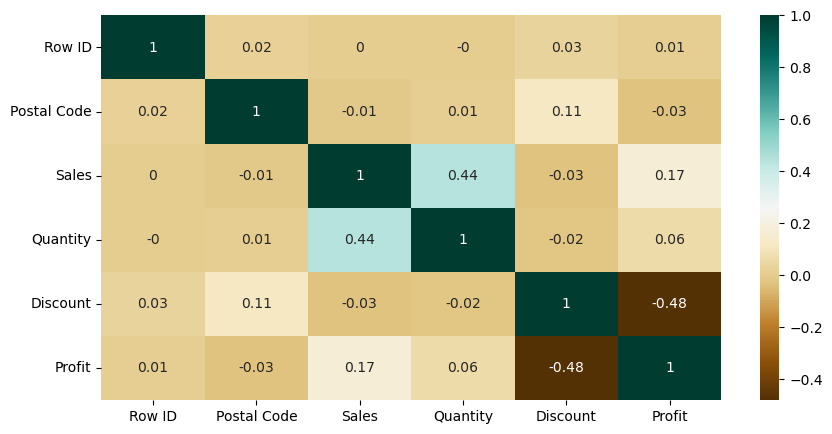

In [14]:
plt.figure(figsize=(10,5))
c= furniture.corr().round(2)
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [15]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount']
furniture.drop(cols, axis = 1, inplace = True)
furniture = furniture.sort_values('Order Date')

In [16]:
furniture.head()

,Order Date,Sales,Profit
845,1/1/2017,474.430,199.2606
1707,1/1/2017,141.420,-187.3815
1708,1/1/2017,310.744,-26.6352
179,1/1/2017,48.896,8.5568
181,1/10/2014,51.940,21.2954


In [17]:
furniture = furniture.groupby("Order Date")['Sales'].sum().reset_index()

In [18]:
furniture.head()

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940


In [19]:
furniture["Order Date"] = pd.to_datetime(furniture['Order Date'], errors='coerce')

In [20]:
furniture.set_index("Order Date",inplace = True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [21]:
furniture.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [22]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-01-01 to 2017-09-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [23]:
y = furniture["Sales"].resample('MS').mean()

### Visualizing Time Series Data :

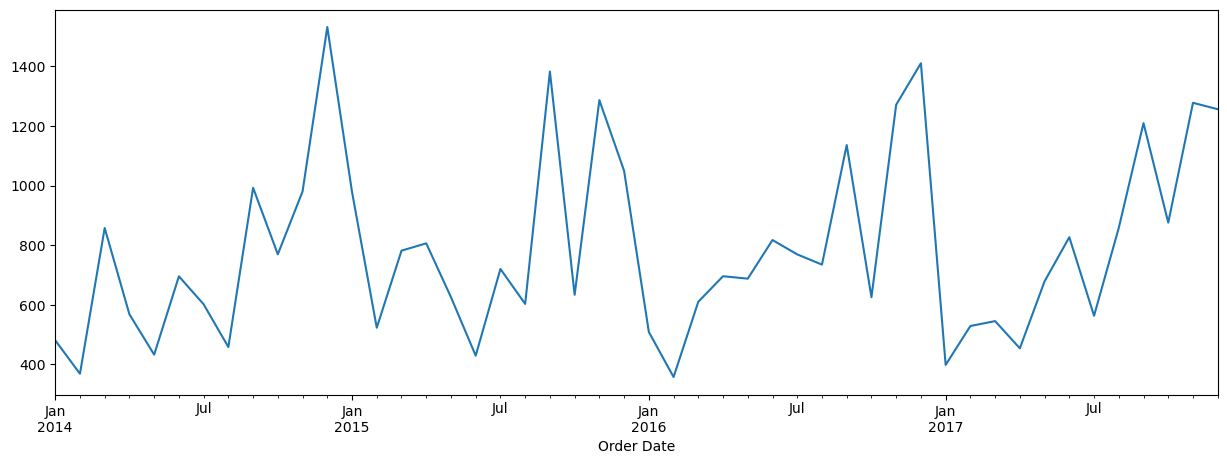

In [24]:
y.plot(figsize=(15,5))
plt.show()

### STATIONARITY TESTING - ADFULLER :

In [25]:
fuller_test = adfuller(furniture['Sales'])
dfoutput = pd.Series(fuller_test[0:4], index=['Test Statistic','P-value','Lags Used','Number of Observations Used'])
for key,value in fuller_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -5.516303
P-value                          0.000002
Lags Used                       12.000000
Number of Observations Used    876.000000
Critical Value (1%)             -3.437837
Critical Value (5%)             -2.864845
Critical Value (10%)            -2.568530
dtype: float64


In [26]:
def test_p_value(df):
    fuller_test = adfuller(furniture)
    print('P-value: ',fuller_test[1])
    if fuller_test[1] <= 0.05:
        print('Reject null hypothesis, data is stationary')
    else:
        print('Do not reject null hypothesis, data is not stationary')  

In [27]:
test_p_value(furniture['Sales'])

P-value:  1.9216137436347707e-06
Reject null hypothesis, data is stationary


### SEASONAL DECOMPOSITION (seasonal, trend, residual) :

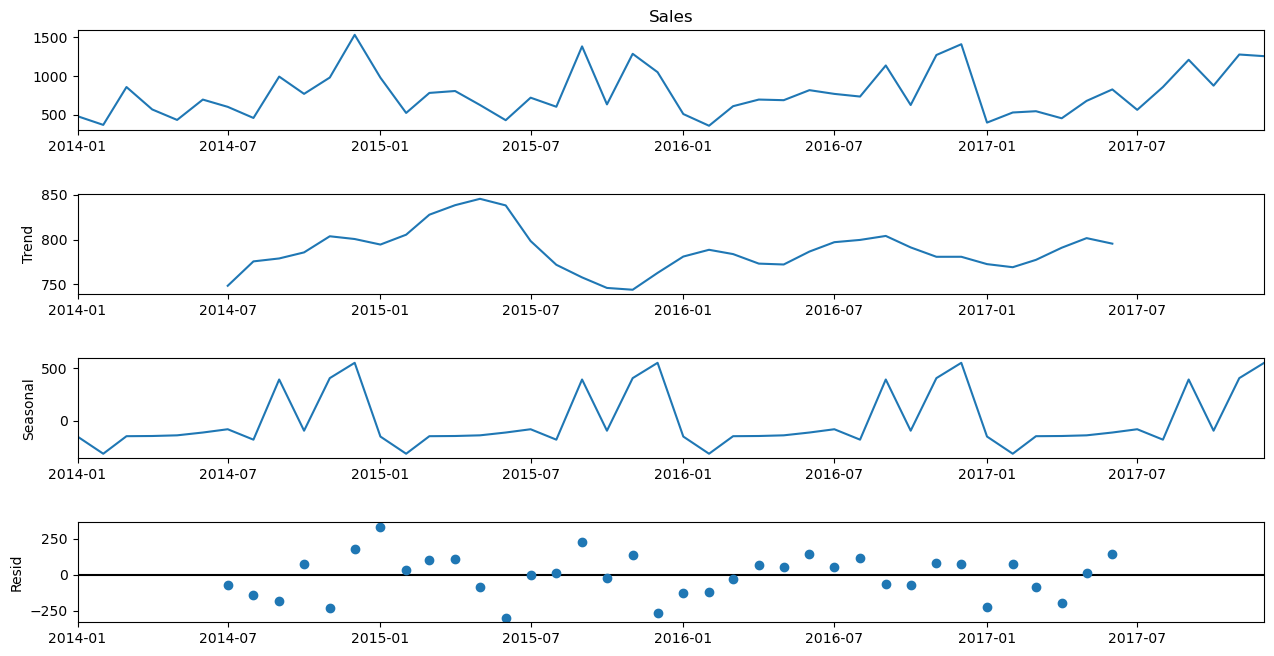

In [28]:
decomp = seasonal_decompose(y)
fig = decomp.plot()
fig.set_size_inches(14,7)

### X_train, X_test :

In [29]:
X_train = furniture['Sales'][:len(furniture)-1000]
X_test = furniture['Sales'][len(furniture)-1000:]

In [30]:
X_train

Order Date
2017-01-01     975.4900
2014-01-10      51.9400
2015-01-10    1018.1040
2016-01-10     104.7700
2014-01-11       9.9400
                ...    
2014-08-27    1232.0600
2016-08-27     244.6150
2017-08-27    2037.7400
2015-08-28     415.3070
2016-08-28     156.3728
Name: Sales, Length: 778, dtype: float64

In [31]:
X_test

Order Date
2017-08-28    1137.7500
2014-08-29     174.0585
2016-08-29     405.8000
2017-08-29     148.0200
2014-08-03     218.7500
                ...    
2016-09-08    3374.9816
2017-09-08    1000.2390
2014-09-09     864.0240
2016-09-09      15.0080
2017-09-09     482.5640
Name: Sales, Length: 111, dtype: float64

### Forecasting AR I MA(p,d,q) and Seasonality's(P,D,Q) :

In [32]:
p = d = q  = range(0, 2) 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(X[0], X[1], X[2], 12) for X in list(itertools.product(p, d, q))]
print('Examples of paramter combination for Seasonal ARIMA....')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of paramter combination for Seasonal ARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [33]:
import statsmodels.api as sm

param_grid = itertools.product(pdq, seasonal_pdq)
for param, param_seasonal in param_grid:
    try:
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()
        print('ARIMA{}x{}12- AIC:{}'.format(param, param_seasonal, results.aic))
    
    except Exception as e:
        continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12- AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12- AIC:1512.2141782148983
ARIMA(0, 0, 0)x(0, 1, 0, 12)12- AIC:477.7170130920111
ARIMA(0, 0, 0)x(0, 1, 1, 12)12- AIC:302.2702899793796


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 0, 0, 12)12- AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12- AIC:1530.210753040608
ARIMA(0, 0, 0)x(1, 1, 0, 12)12- AIC:318.00471991163414


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 1, 1, 12)12- AIC:304.2488280302721
ARIMA(0, 0, 1)x(0, 0, 0, 12)12- AIC:720.9252270758101
ARIMA(0, 0, 1)x(0, 0, 1, 12)12- AIC:2725.73160034625
ARIMA(0, 0, 1)x(0, 1, 0, 12)12- AIC:466.5607429809164


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 1, 1, 12)12- AIC:291.62613896732995
ARIMA(0, 0, 1)x(1, 0, 0, 12)12- AIC:499.57038914483076


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12- AIC:2649.9101727178627
ARIMA(0, 0, 1)x(1, 1, 0, 12)12- AIC:319.9884876946867


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12- AIC:291.8725576428801
ARIMA(0, 1, 0)x(0, 0, 0, 12)12- AIC:677.8947668414504


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 0, 1, 12)12- AIC:1391.4143434582893
ARIMA(0, 1, 0)x(0, 1, 0, 12)12- AIC:486.6378567211039
ARIMA(0, 1, 0)x(0, 1, 1, 12)12- AIC:304.9671228167959
ARIMA(0, 1, 0)x(1, 0, 0, 12)12- AIC:497.7889663004408


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 0, 1, 12)12- AIC:1341.6322021362023
ARIMA(0, 1, 0)x(1, 1, 0, 12)12- AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12- AIC:306.9113200151459
ARIMA(0, 1, 1)x(0, 0, 0, 12)12- AIC:649.9056176817257
ARIMA(0, 1, 1)x(0, 0, 1, 12)12- AIC:1011.1072911137464


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 1, 0, 12)12- AIC:458.8705548482728
ARIMA(0, 1, 1)x(0, 1, 1, 12)12- AIC:279.58062333809045
ARIMA(0, 1, 1)x(1, 0, 0, 12)12- AIC:486.18329774425575
ARIMA(0, 1, 1)x(1, 0, 1, 12)12- AIC:2522.804132839827


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 0, 12)12- AIC:310.75743684173074
ARIMA(0, 1, 1)x(1, 1, 1, 12)12- AIC:281.55766214612527
ARIMA(1, 0, 0)x(0, 0, 0, 12)12- AIC:692.1645522067713
ARIMA(1, 0, 0)x(0, 0, 1, 12)12- AIC:1336.0200811914551


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 1, 0, 12)12- AIC:479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12- AIC:304.20776751609816
ARIMA(1, 0, 0)x(1, 0, 0, 12)12- AIC:480.9259367935205


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12- AIC:1646.584047869031
ARIMA(1, 0, 0)x(1, 1, 0, 12)12- AIC:304.4664675084559
ARIMA(1, 0, 0)x(1, 1, 1, 12)12- AIC:304.5842692143838
ARIMA(1, 0, 1)x(0, 0, 0, 12)12- AIC:665.77944421856
ARIMA(1, 0, 1)x(0, 0, 1, 12)12- AIC:2662.745462811701


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 1, 0, 12)12- AIC:468.368519581399
ARIMA(1, 0, 1)x(0, 1, 1, 12)12- AIC:293.34221939659227
ARIMA(1, 0, 1)x(1, 0, 0, 12)12- AIC:482.5763323877195
ARIMA(1, 0, 1)x(1, 0, 1, 12)12- AIC:2556.2512641349717


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 0, 12)12- AIC:306.01560022474007


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12- AIC:293.7513188124041
ARIMA(1, 1, 0)x(0, 0, 0, 12)12- AIC:671.2513547541902


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12- AIC:1373.9040760492685
ARIMA(1, 1, 0)x(0, 1, 0, 12)12- AIC:479.20034222811347
ARIMA(1, 1, 0)x(0, 1, 1, 12)12- AIC:300.2130611619096
ARIMA(1, 1, 0)x(1, 0, 0, 12)12- AIC:475.34036587845566


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12- AIC:1527.0133964729714
ARIMA(1, 1, 0)x(1, 1, 0, 12)12- AIC:300.62709013453804
ARIMA(1, 1, 0)x(1, 1, 1, 12)12- AIC:302.3264992508564
ARIMA(1, 1, 1)x(0, 0, 0, 12)12- AIC:649.0318019834979


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12- AIC:938.3014568195242
ARIMA(1, 1, 1)x(0, 1, 0, 12)12- AIC:460.47626876100213
ARIMA(1, 1, 1)x(0, 1, 1, 12)12- AIC:281.38730069394035
ARIMA(1, 1, 1)x(1, 0, 0, 12)12- AIC:469.5250354660813


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12- AIC:1861.2154614443518
ARIMA(1, 1, 1)x(1, 1, 0, 12)12- AIC:297.7875439545454


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12- AIC:283.36610170083907


### Predicted sales to Real sales :

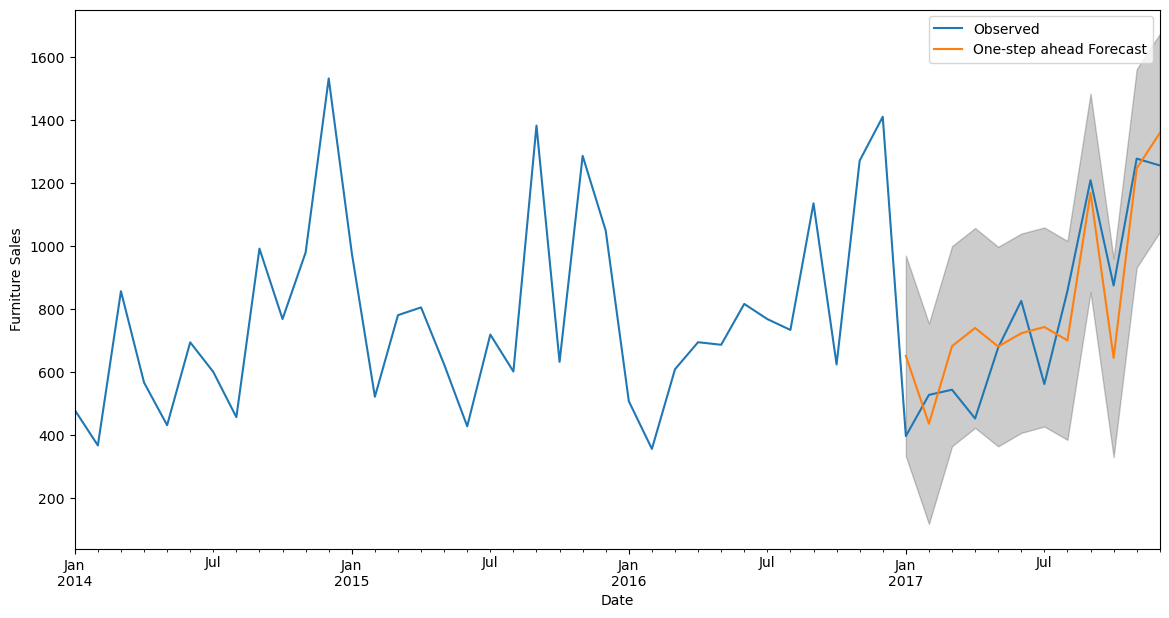

In [34]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',alpha=1, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### RMSE :

In [35]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 160.34


### Visualizing :

            lower Sales  upper Sales
2018-01-01   180.614446   809.068361
2018-02-01   186.307787   815.748698
2018-03-01   282.718976   912.324894
2018-04-01   231.728334   861.321190
2018-05-01   371.217272  1000.811777
2018-06-01   495.551315  1125.146196
2018-07-01   318.521485   948.117009
2018-08-01   505.345559  1134.941845
2018-09-01   900.312953  1529.910136
2018-10-01   503.957521  1133.555733
2018-11-01   970.175172  1599.774528
2018-12-01   983.028409  1612.629507
2019-01-01   113.356329   891.794238


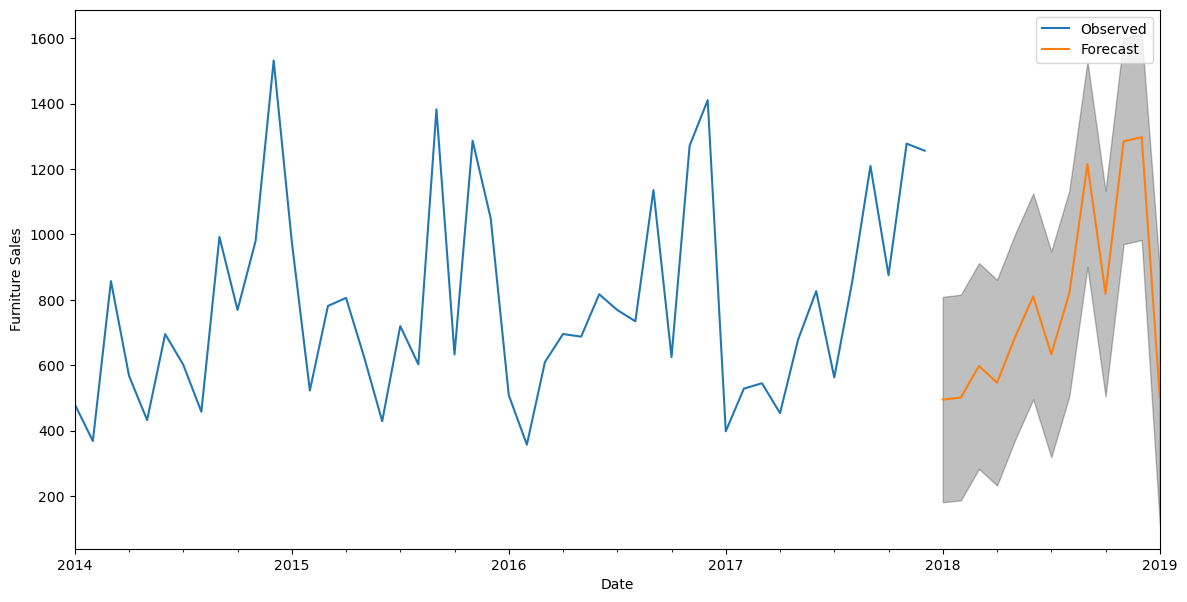

In [37]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()